In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
mpl.rcParams['figure.dpi']= 500
sns.set_context("notebook")
sns.set(style="white")

In [3]:
cellvgae_umap = np.load('CellVGAE/cellvgae_umap.npy')
cellvgae_clusters = np.load('CellVGAE/cellvgae_clusters.npy')

In [4]:
sam_umap = np.load('SAM/sam_umap.npy')
sam_clusters = np.load('SAM/sam_clusters.npy')

In [5]:
diffvae_umap = np.load('DiffVAE/diffvae_umap.npy')
diffvae_clusters = np.load('DiffVAE/diffvae_clusters.npy')

<ipython-input-6-e564bc0e1e82>:19: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x000001EF297878E0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax1.legend(handletextpad=0.3, fontsize=5, labels=['_nolegend_', 'Alpha', 'Gamma', 'Acinar', 'Mesenchymal', 'Beta', 'Delta', 'Ductal', 'Endothelial'], frameon=False)
<ipython-input-6-e564bc0e1e82>:26: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x000001EF29802880> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax2.legend(handletextpad=0.3, fontsize=5, loc='upper left', labels=['_nolegend_', 'No overlap', 'Endothelial', 'Mesenchymal', 'Gamma', 'Alpha', 'Ductal', 'Acinar', 'Delta', 'Beta'], frameon=False)
<ipython-input-6-e564bc0e1e82>:32: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x000001EF29830A30> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax3.legend(

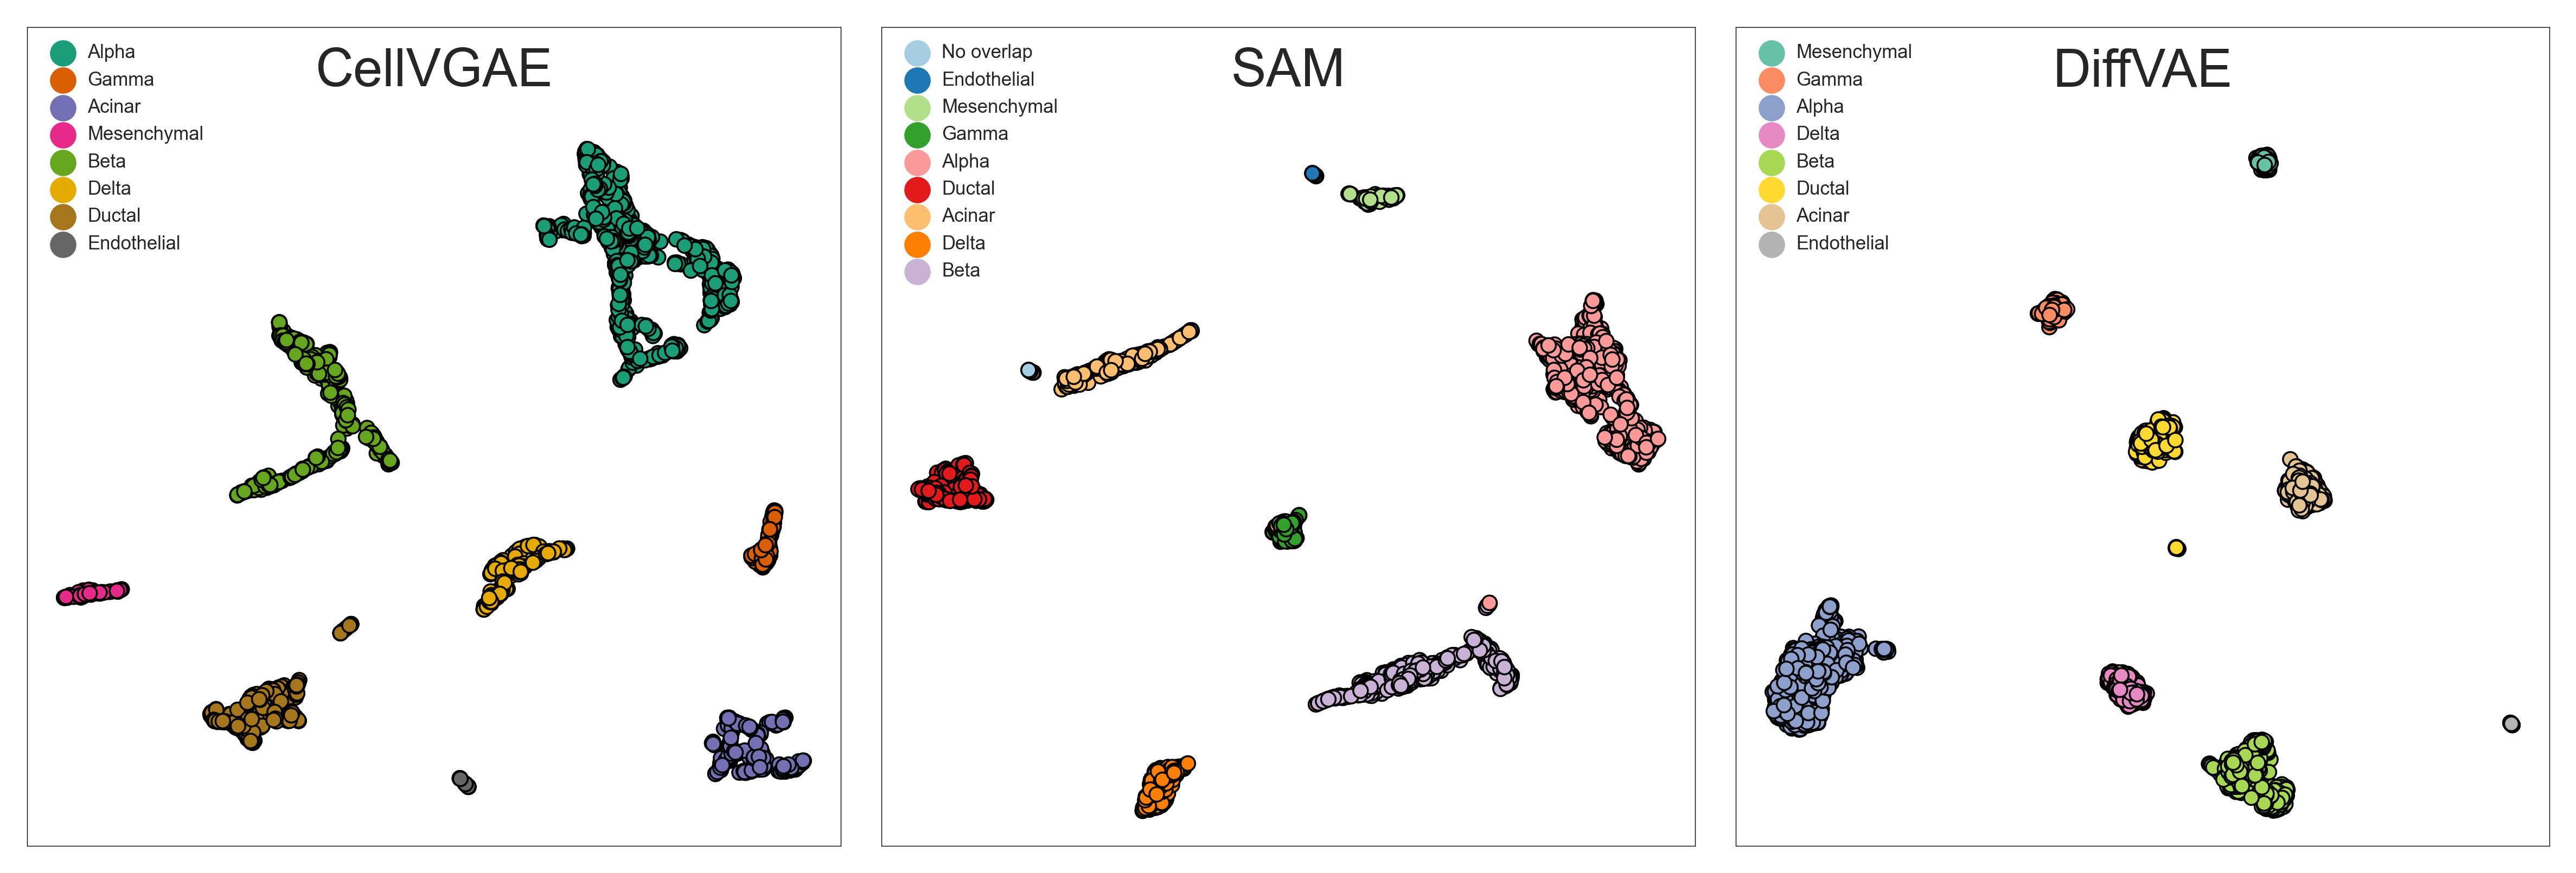

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
sns.scatterplot(x=cellvgae_umap[:, 0], y=cellvgae_umap[:, 1], hue=cellvgae_clusters, palette=sns.color_palette("Dark2", len(set(cellvgae_clusters))), s=15, edgecolor='black', linewidth=0.5, ax=ax1)
sns.scatterplot(x=sam_umap[:, 0], y=sam_umap[:, 1], hue=sam_clusters, palette=sns.color_palette("Paired", len(set(sam_clusters))), s=15, edgecolor='black', linewidth=0.5, ax=ax2)
sns.scatterplot(x=diffvae_umap[:, 0], y=diffvae_umap[:, 1], hue=diffvae_clusters, palette=sns.color_palette("Set2", len(set(diffvae_clusters))), s=15, edgecolor='black', linewidth=0.5, ax=ax3)

plt.setp(ax1.spines.values(), color='black')
plt.setp(ax2.spines.values(), color='black')
plt.setp(ax3.spines.values(), color='black')

for ax in (ax1, ax2, ax3):
    ax.spines['left'].set_linewidth(0.2)
    ax.spines['top'].set_linewidth(0.2)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['right'].set_linewidth(0.2)

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
# ax1.get_legend().remove()
ax1.legend(handletextpad=0.3, fontsize=5, labels=['_nolegend_', 'Alpha', 'Gamma', 'Acinar', 'Mesenchymal', 'Beta', 'Delta', 'Ductal', 'Endothelial'], frameon=False)
ax1.set_title("CellVGAE", position=(0.5, 0.9), fontdict={'fontsize': 14})
plt.setp(ax1, ylim=(-10, 24))

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
# ax2.get_legend().remove()
ax2.legend(handletextpad=0.3, fontsize=5, loc='upper left', labels=['_nolegend_', 'No overlap', 'Endothelial', 'Mesenchymal', 'Gamma', 'Alpha', 'Ductal', 'Acinar', 'Delta', 'Beta'], frameon=False)
ax2.set_title("SAM", position=(0.5, 0.9), fontdict={'fontsize': 14})
plt.setp(ax2, ylim=(-11, 26.5))

ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax3.legend(handletextpad=0.3, fontsize=5, loc='upper left', labels=['_nolegend_', 'Mesenchymal', 'Gamma', 'Alpha', 'Delta', 'Beta', 'Ductal', 'Acinar', 'Endothelial'], frameon=False)
ax3.set_title("DiffVAE", position=(0.5, 0.9), fontdict={'fontsize': 14})
# ax3.get_legend().remove()
plt.setp(ax3, ylim=(-9, 22))

plt.subplots_adjust(wspace=0.05, hspace=0.05)
# plt.savefig('muraro_clusters_w_legend.pdf', dpi=500, bbox_inches='tight')

In [7]:
def overlap_percent(vgae_list, truth_list):
    common = len([x for x in vgae_list if x in truth_list])
    return common, common / len(truth_list)

In [8]:
def get_cells_by_cluster(assignment_df, cluster_id):
    return assignment_df.loc[assignment_df['Cluster'] == cluster_id].index.values

In [9]:
def print_overlap(clusters, name):
    method_assignment_df = pd.DataFrame.from_dict(dict(zip(cells, clusters)), orient="index", columns=['Cluster'])
    for cl in set(clusters):
        ops = []
        for s_cl in set(gt_df['Cluster'].values):
            op = overlap_percent(get_cells_by_cluster(method_assignment_df, cl), get_cells_by_cluster(gt_df, s_cl))
            if op[1] > 0:
                ops.append((s_cl, op[0], op[1]))
                print('%s cluster %d -- Truth cluster %s -- Overlap (%d, %.4f)' % (name, cl, s_cl, op[0], op[1]))

In [10]:
gt_df = pd.read_csv('muraro_ground_truth.csv')

In [11]:
cells = gt_df['Cell'].values

In [12]:
gt_df.set_index('Cell', inplace=True)

In [13]:
print_overlap(cellvgae_clusters, 'CellVGAE')

CellVGAE cluster 0 -- Truth cluster delta -- Overlap (1, 0.0052)
CellVGAE cluster 0 -- Truth cluster gamma -- Overlap (1, 0.0099)
CellVGAE cluster 0 -- Truth cluster beta -- Overlap (2, 0.0045)
CellVGAE cluster 0 -- Truth cluster alpha -- Overlap (802, 0.9877)
CellVGAE cluster 1 -- Truth cluster gamma -- Overlap (98, 0.9703)
CellVGAE cluster 1 -- Truth cluster epsilon -- Overlap (3, 1.0000)
CellVGAE cluster 1 -- Truth cluster beta -- Overlap (7, 0.0156)
CellVGAE cluster 2 -- Truth cluster ductal -- Overlap (7, 0.0286)
CellVGAE cluster 2 -- Truth cluster gamma -- Overlap (2, 0.0198)
CellVGAE cluster 2 -- Truth cluster beta -- Overlap (3, 0.0067)
CellVGAE cluster 2 -- Truth cluster alpha -- Overlap (1, 0.0012)
CellVGAE cluster 2 -- Truth cluster acinar -- Overlap (218, 0.9954)
CellVGAE cluster 3 -- Truth cluster ductal -- Overlap (2, 0.0082)
CellVGAE cluster 3 -- Truth cluster beta -- Overlap (1, 0.0022)
CellVGAE cluster 3 -- Truth cluster mesenchymal -- Overlap (79, 0.9875)
CellVGAE clu